In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
#display the dataframe
df = pd.read_csv('ex1data1.csv',header=None)
df.columns = ['Population','Profit']
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
#number of training examples
m = len(df.Population)
m

97

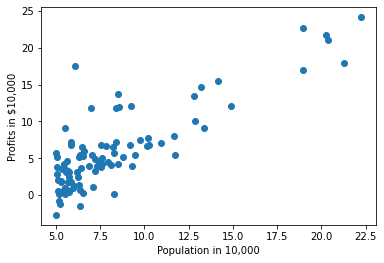

In [5]:
#Plot the data
X = df.Population
Y = df.Profit
plt.scatter(X,Y)
plt.xlabel('Population in 10,000')
plt.ylabel('Profits in $10,000')
plt.show()

In [6]:
#create function that returns the cost function

def CostFunction(a,b,t):
    h = np.dot(a,t)
    sq = np.square(np.subtract(h,b))
    J = (1/(2*m))*np.sum(sq)
    return J

list = [[0],[0]]
theta = np.array(list)

one = np.ones(97)
X_array = np.asarray(df['Population'])
x = np.array([one, X_array]).T

y = np.array([np.asarray(df.Profit)]).T

CostFunction(x,y,theta)

32.072733877455676

In [7]:
#create a function that computes thetas (gradient descent)

def gradient_descent(a,b,t,l_rate,it):
    J_history = np.zeros(it)
    
    for i in range(it):
        
        a = x[:,1]
        
        h = t[0] + t[1]*np.array([a]).T
        
        t_one = t[0] - l_rate*(1/m)*np.sum(np.subtract(np.array(h),b))
        t_two = t[1] - l_rate*(1/m)*np.sum(np.multiply(np.subtract(h,b),np.array([a]).T))
        t = [t_one,t_two]
        
        J_history[i] = CostFunction(x,y,theta)
        
        min_J = min(J_history)
    
    return t

alpha = 0.01
iterations = 1500
theta = [[0],[0]]

theta = gradient_descent(x,y,theta,alpha,iterations)
theta

[array([-3.63029144]), array([1.16636235])]

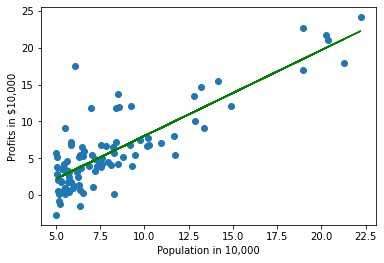

In [20]:
#We plot the regression line
X = df.Population
Y = df.Profit

plt.scatter(X,y)
plt.plot(X,theta[1]*X+theta[0],color = 'g')
plt.xlabel('Population in 10,000')
plt.ylabel('Profits in $10,000')
plt.show()